# Free-lick behavior analysis
This notebook is for more specific analysis of behavior than that covered in `behavior.py`, which provides a more day-to-day analysis of behavior for determining mouse and population performance.

## Initial setup

### Imports

In [1]:
import sys, os
import json
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0, '../python/')
from util import find_files, find_data, recursive_dict_search
from analysis import get_lick_stats
from session import FreeSession
from plot import Plotter
import util
import ephys

mountainlab_pytools module not installed. Some functions from the ephys package may not be available.


In [2]:
import importlib
importlib.reload(util)

<module 'util' from '../python\\util.py'>

### Settings

In [2]:
# Set experiment settings
mouse_ids  = ['j6z1', 'j6z2', 'j6z3', 'j6z4', 'j6z5', 'j6z6', 'j6z7']
exp_name = 'j6'
data_dir = 'Y:/James/data/'
exclude_strs = ['sound', 'error']
day_range = [3, 100]
sess_dir = 'G:/My Drive/Projects/foraging/data/sess_data/'
results_dir = 'G:/My Drive/Projects/foraging/analysis/free_lick/%s/'.format(exp_name)
save_updates = True
plot_settings = {'cmap': 'copper',
                 'rcParams': {'font.size': 12}}

In [3]:
# Create directories if needed
if not os.path.isdir(sess_dir):
    os.mkdir(sess_dir)
if not os.path.isdir(results_dir):
    os.mkdir(results_dir)
if not os.path.isdir(results_dir + exp_name + '/'):
    os.mkdir(results_dir + exp_name + '/') # population results
for mouse_id in mouse_ids:
    if not os.path.isdir(results_dir + mouse_id + '/'):
        os.mkdir(results_dir + mouse_id + '/') # individual results

### Load sessions

In [4]:
# Create Session objects from filenames
sessions = {}
days = {}
files = find_files(data_dir, [])
for mouse_id in mouse_ids:
    # Get filenames and training days
    filelist, training_days = find_data(mouse_id, files, exclude_strs=exclude_strs)

    # Filter by global training range
    if len(day_range) > 0:
        keep_idx = np.logical_and(training_days >= day_range[0], 
                                  training_days <= day_range[1])
        filelist = [f for f, keep in zip(filelist, keep_idx) if keep]
        training_days = training_days[keep_idx]

    # Check filelist
    print('Files to analyze (mouse %s):' % mouse_id)
    print('Day  Filename')
    for day, f in zip(training_days, filelist):
        print('%2d: ' % day, f)
    print()
    
    # Store as sessions, days
    for filename in filelist:
        FreeSession(filename)
    sessions[mouse_id] = [FreeSession(filename) for filename in filelist]
    days[mouse_id] = training_days

Files to analyze (mouse j6z1):
Day  Filename
 3:  Y:/James/data/ChamberB\12-27-18\j6z1_d03_2018_12_27_13_57_37.mat
 4:  Y:/James/data/ChamberB\12-28-18\j6z1_d04_2018_12_28_14_29_52.mat
 5:  Y:/James/data/ChamberA\12-31-18\j6z1_d05_2018_12_31_15_08_09.mat
 6:  Y:/James/data/ChamberA\01-02-19\j6z1_d06_2019_01_02_14_59_15.mat
 9:  Y:/James/data/ChamberB\01-07-19\j6z1_d09_2019_01_07_09_43_54.mat
12:  Y:/James/data/ChamberB\01-10-19\j6z1_d12_2019_01_10_16_09_46.mat
13:  Y:/James/data/ChamberA\01-11-19\j6z1_d13_2019_01_11_12_34_40.mat
14:  Y:/James/data/ChamberB\01-14-19\j6z1_d14_2019_01_14_09_44_07.mat
16:  Y:/James/data/ChamberB\01-16-19\j6z1_d16_2019_01_16_11_12_55.mat
17:  Y:/James/data/ChamberB\01-16-19\j6z1_d17_2019_01_17_14_31_48.mat
20:  Y:/James/data/ChamberB\01-24-19\j6z1_d20_2019_01_24_13_41_57.mat
21:  Y:/James/data/ChamberA\01-25-19\j6z1_d21_2019_01_25_13_14_44.mat
22:  Y:/James/data/ChamberB\01-28-19\j6z1_d22_2019_01_28_13_29_13.mat
23:  Y:/James/data/ChamberB\01-29-19\j6z1_d23

Files to analyze (mouse j6z7):
Day  Filename
 3:  Y:/James/data/ChamberB\12-27-18\j6z7_d03_2018_12_27_14_55_39.mat
 4:  Y:/James/data/ChamberB\12-28-18\j6z7_d04_2018_12_28_14_30_46.mat
 5:  Y:/James/data/ChamberB\12-31-18\j6z7_d05_2018_12_31_14_32_42.mat
 6:  Y:/James/data/ChamberA\01-02-19\j6z7_d06_2019_01_02_14_58_07.mat
 9:  Y:/James/data/ChamberA\01-07-19\j6z7_d09_2019_01_07_09_41_36.mat
10:  Y:/James/data/ChamberA\01-08-19\j6z7_d10_2019_01_08_14_53_31.mat
11:  Y:/James/data/ChamberA\01-09-19\j6z7_d11_2019_01_09_11_02_45.mat
12:  Y:/James/data/ChamberB\01-10-19\j6z7_d12_2019_01_10_16_09_51.mat
13:  Y:/James/data/ChamberA\01-11-19\j6z7_d13_2019_01_11_12_34_59.mat
14:  Y:/James/data/ChamberA\01-14-19\j6z7_d14_2019_01_14_11_33_51.mat
15:  Y:/James/data/ChamberA\01-15-19\j6z7_d15_2019_01_15_10_49_26.mat
16:  Y:/James/data/ChamberA\01-16-19\j6z7_d16_2019_01_16_11_11_34.mat
17:  Y:/James/data/ChamberB\01-17-19\j6z7_d17_2019_01_17_14_32_05.mat
20:  Y:/James/data/ChamberB\01-24-19\j6z7_d20

In [5]:
# Load session data
print('Checking for data in %s...' % sess_dir)
for mouse_id in mouse_ids:
    print('Loading mouse %s:' % mouse_id)
    for sess, day in zip(sessions[mouse_id], days[mouse_id]):
        print('Loading session %02d...' % day, end=' ')
        try:
            filepath = sess_dir + mouse_id + '/%02d.p' % day 
            sess.load(filepath, ignore_keys=['data_names', 'var_names'])
            print('loaded.')
        except FileNotFoundError:
            print('file not found.') 
    print()

Checking for data in G:/My Drive/Projects/foraging/data/sess_data/...
Loading mouse j6z1:
Loading session 03... loaded.
Loading session 04... loaded.
Loading session 05... loaded.
Loading session 06... loaded.
Loading session 09... loaded.
Loading session 12... loaded.
Loading session 13... loaded.
Loading session 14... loaded.
Loading session 16... loaded.
Loading session 17... loaded.
Loading session 20... loaded.
Loading session 21... loaded.
Loading session 22... loaded.
Loading session 23... loaded.
Loading session 24... loaded.
Loading session 25... loaded.
Loading session 26... loaded.
Loading session 27... file not found.
Loading session 28... loaded.
Loading session 29... loaded.
Loading session 30... file not found.

Loading mouse j6z2:
Loading session 03... loaded.
Loading session 04... loaded.
Loading session 05... loaded.
Loading session 06... loaded.
Loading session 09... loaded.
Loading session 11... loaded.
Loading session 12... loaded.
Loading session 13... loaded.
Loa

### Other setup

In [6]:
# Define periodic save function
def save_sessions(mouse_id):
    print('Saving sessions for mouse %s...' % mouse_id)
    mouse_dir = sess_dir + mouse_id + '/'
    if not os.path.isdir(mouse_dir):
        os.mkdir(mouse_dir)
    for sess, day in zip(sessions[mouse_id], days[mouse_id]):
        sess.save(mouse_dir + '%02d.p' % day)

In [7]:
# Create plot object
plotter = Plotter(**plot_settings)

## Patch dynamics

### Reward rate vs. time in patch

In [8]:
# Create time bins for reward
t_start = 0.0
t_stop = 150.0
dt_bin = 5.0
bins = np.arange(int(t_start), int(t_stop/dt_bin)+1)*dt_bin

# Placeholders
counts = np.zeros(bins.shape[0]-1)
r_bins = np.zeros([bins.shape[0]-1])

for mouse_id in mouse_ids:
    print('Analyzing mouse %s:' % mouse_id)
    
    for sess, day in zip(sessions[mouse_id], days[mouse_id]):
        print('Processing session %d...' % day, end=' ')
        
        try:
            # Get session stats
            t_patch = sess.get_patch_times()
            dt_patch = sess.get_patch_durations()
            t_motor = sess.get_motor_times()
            r_motor = sess.get_reward_volumes()

            # Transform motor time to be relative to patch start
            pad = 0.5 # padding in seconds
            _, idx_patch = util.in_interval(t_motor, 
                                            t_patch[:, 0]-pad, 
                                            t_patch[:, 1]+pad, 
                                            query='event_interval')
            t_motor_rel = t_motor - t_patch[idx_patch, 0]

            # Count number of patches within each time bin
            idx_bins, idx_patch = util.in_interval(bins[:-1], 
                                                   np.zeros(t_patch.shape[0]), 
                                                   dt_patch-dt_bin, 
                                                   query='event_interval')
            counts_ = np.zeros([t_patch.shape[0], bins.shape[0]-1])
            counts_[idx_patch, idx_bins] += 1
            counts += np.sum(counts_, axis=0)

            # Find reward volume within each time bin
            idx_motor, idx_bins = util.in_interval(t_motor_rel,
                                                   bins[:-1], 
                                                   bins[1:], 
                                                   query='event_interval')
            r_bins[idx_bins] += r_motor[idx_motor]
            
            print('done.')
            
        except UserWarning as w: # unanalyzable session (e.g. not enough patches)
            print(w)
        
        # Clear data for memory management
        sess.clear_data()
        
    
    # Save updated session variables
    if save_updates:
        save_sessions(mouse_id)
    print()

Analyzing mouse j6z1:
Processing session 3... done.
Processing session 4... done.
Processing session 5... done.
Processing session 6... done.
Processing session 9... done.
Processing session 12... done.
Processing session 13... done.
Processing session 14... done.
Processing session 16... done.
Processing session 17... done.
Processing session 20... done.
Processing session 21... done.
Processing session 22... done.
Processing session 23... done.
Processing session 24... done.
Processing session 25... done.
Processing session 26... done.
Processing session 27... done.
Processing session 28... done.
Processing session 29... done.
Processing session 30... done.
Saving sessions for mouse j6z1...

Analyzing mouse j6z2:
Processing session 3... done.
Processing session 4... done.
Processing session 5... done.
Processing session 6... done.
Processing session 9... done.
Processing session 11... done.
Processing session 12... done.
Processing session 13... done.
Processing session 14... done.
P

In [14]:
# Smooth total reward
r_smooth = ephys.smooth_spike_counts(counts=r_bins,
                                     dt_bin=dt_bin,
                                     method='kernel',
                                     kernel_type='Gaussian',
                                     sigma=dt_bin)

# Get average binned reward
r_bins_avg = r_bins[counts > 0] / counts[counts > 0]

# Smooth average reward
r_smooth_avg = ephys.smooth_spike_counts(counts=r_bins_avg,
                                         dt_bin=dt_bin,
                                         method='kernel',
                                         kernel_type='Gaussian',
                                         sigma=dt_bin)

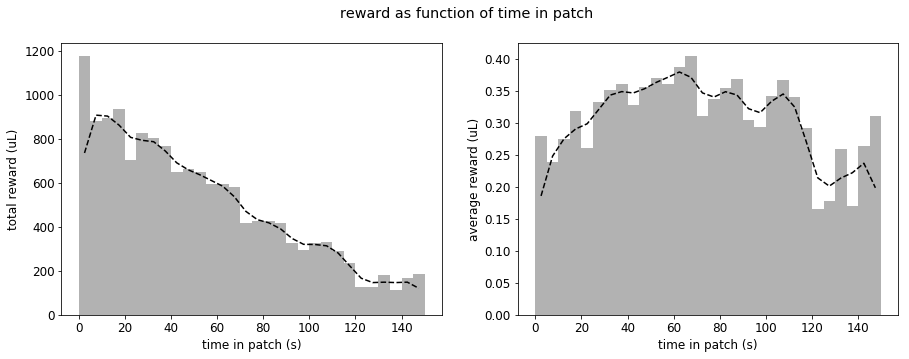

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].bar(bins[:-1]+dt_bin/2, height=r_bins, width=dt_bin, color='black', alpha=0.3)
ax[0].plot(bins[:-1]+dt_bin/2, r_smooth, color='black', linestyle='--')
ax[1].bar(bins[:-1]+dt_bin/2, height=r_bins_avg, width=dt_bin, color='black', alpha=0.3)
ax[1].plot(bins[:-1]+dt_bin/2, r_smooth_avg, color='black', linestyle='--')

fig.suptitle('reward as function of time in patch')
ax[0].set_xlabel('time in patch (s)')
ax[0].set_ylabel('total reward (uL)')
ax[1].set_xlabel('time in patch (s)')
ax[1].set_ylabel('average reward (uL)');

### Lick rate vs. time in patch

In [19]:
# Create time bins for reward
t_start = 0.0
t_stop = 150.0
dt_bin = 5.0
bins = np.arange(int(t_start), int(t_stop/dt_bin)+1)*dt_bin

# Placeholders
counts = np.zeros(bins.shape[0]-1)
l_bins = np.zeros([bins.shape[0]-1])

for mouse_id in mouse_ids:
    print('Analyzing mouse %s:' % mouse_id)
    
    for sess, day in zip(sessions[mouse_id], days[mouse_id]):
        print('Processing session %d...' % day, end=' ')
        
        try:
            # Get session stats
            t_patch = sess.get_patch_times()
            dt_patch = sess.get_patch_durations()
            t_lick = sess.get_lick_times()
            
            # Filter by lick times within patches
            in_patch = util.in_interval(t_lick, 
                                        t_patch[:, 0], 
                                        t_patch[:, 1], 
                                        query='event')
            t_lick = t_lick[in_patch.astype(np.bool)]
            
            # Transform lick time to be relative to patch start
            _, idx_patch = util.in_interval(t_lick, 
                                            t_patch[:, 0], 
                                            t_patch[:, 1], 
                                            query='event_interval')
            t_lick_rel = t_lick - t_patch[idx_patch, 0]

            # Count number of patches within each time bin
            idx_bins, idx_patch = util.in_interval(bins[:-1], 
                                                   np.zeros(t_patch.shape[0]), 
                                                   dt_patch-dt_bin, 
                                                   query='event_interval')
            counts_ = np.zeros([t_patch.shape[0], bins.shape[0]-1])
            counts_[idx_patch, idx_bins] += 1
            counts += np.sum(counts_, axis=0)

            # Find number of licks within each time bin
            n_bins = util.in_interval(t_lick_rel,
                                      bins[:-1], 
                                      bins[1:], 
                                      query='interval')
            l_bins += n_bins
            
            print('done.')
            
        except UserWarning as w: # unanalyzable session (e.g. not enough patches)
            print(w)
        
        # Clear data for memory management
        sess.clear_data()
        
    
    # Save updated session variables
    if save_updates:
        save_sessions(mouse_id)
    print()

Analyzing mouse j6z1:
Processing session 3... done.
Processing session 4... done.
Processing session 5... done.
Processing session 6... done.
Processing session 9... done.
Processing session 12... done.
Processing session 13... done.
Processing session 14... done.
Processing session 16... done.
Processing session 17... done.
Processing session 20... done.
Processing session 21... done.
Processing session 22... done.
Processing session 23... done.
Processing session 24... done.
Processing session 25... done.
Processing session 26... done.
Processing session 27... done.
Processing session 28... done.
Processing session 29... done.
Processing session 30... done.
Saving sessions for mouse j6z1...

Analyzing mouse j6z2:
Processing session 3... done.
Processing session 4... done.
Processing session 5... done.
Processing session 6... done.
Processing session 9... done.
Processing session 11... done.
Processing session 12... done.
Processing session 13... done.
Processing session 14... done.
P

In [20]:
# Smooth total number of licks
l_smooth = ephys.smooth_spike_counts(counts=l_bins,
                                     dt_bin=dt_bin,
                                     method='kernel',
                                     kernel_type='Gaussian',
                                     sigma=dt_bin)

# Get average binned number of licks
l_bins_avg = l_bins[counts > 0] / counts[counts > 0]

# Smooth average binned number of licks
l_smooth_avg = ephys.smooth_spike_counts(counts=l_bins_avg,
                                         dt_bin=dt_bin,
                                         method='kernel',
                                         kernel_type='Gaussian',
                                         sigma=dt_bin)

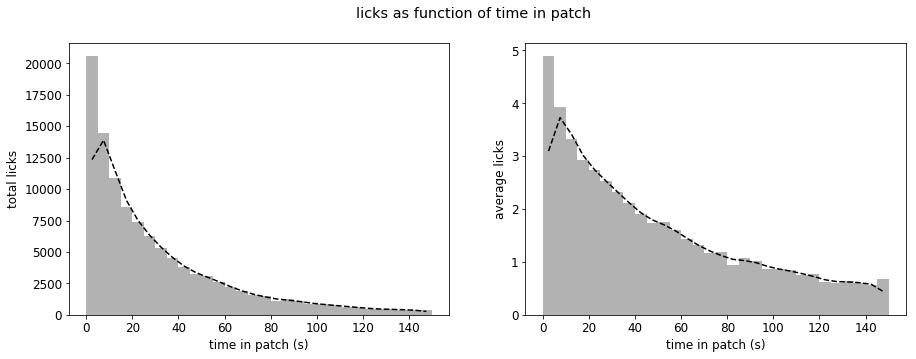

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].bar(bins[:-1]+dt_bin/2, height=l_bins, width=dt_bin, color='black', alpha=0.3)
ax[0].plot(bins[:-1]+dt_bin/2, l_smooth, color='black', linestyle='--')
ax[1].bar(bins[:-1]+dt_bin/2, height=l_bins_avg, width=dt_bin, color='black', alpha=0.3)
ax[1].plot(bins[:-1]+dt_bin/2, l_smooth_avg, color='black', linestyle='--')

fig.suptitle('licks as function of time in patch')
ax[0].set_xlabel('time in patch (s)')
ax[0].set_ylabel('total licks')
ax[1].set_xlabel('time in patch (s)')
ax[1].set_ylabel('average licks');

## Batch analysis
Batch analysis has been moved to `behavior.py`.